In [1]:
# 各種ライブラリの読み込み
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
# 割り当てられたGPUの確認，ランダムにGPUが割り振られるので，人と違う場合がある
!nvidia-smi

# Google colabのPythonバージョン確認，自分の環境であればいらないのでコメントアウトする
!python3 --version # -> Python 3.6.9

# TFのバージョン確認
print("TensorFlow version -> ",tf.__version__) # TensorFlow version ->  2.3.0

# Google colab用cudaバージョン確認
!nvcc -V

Sun Apr 11 02:41:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# GPU内の計算順を固定するかどうかのフラグを指定
# 環境変数['TF_DETERMINISTIC_OPS']を'1'または'True'を設定することで固定できる
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# グローバルシードの指定
global_seed=1234
tf.random.set_seed(global_seed)

In [4]:
# データの読み込み
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

# データを[0~255]から[0~1]に整形
X_train=(X_train).astype(np.float32)/255.
X_test=(X_test).astype(np.float32)/255.

# [batch,height,width]->[batch,height,width,channel]に整形．畳み込みに渡す行列は4次元を受け取る
X_train = np.expand_dims(X_train, axis=3)   #(60000, 28, 28) ->(60000, 28, 28, 1)
X_test = np.expand_dims(X_test, axis=3)     ##(10000, 28, 28) ->(10000, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)    # [60000,] ->[10000,10]
y_test = tf.keras.utils.to_categorical(y_test, 10)      # [10000,] ->[10000,10]

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
def show(a_img, cmap=None):
    plt.figure()
    plt.imshow(a_img, cmap=cmap)
    plt.axis('off')
    plt.show()

In [6]:
# 動作レベルシードの固定
operation_lebel_seed=0
# 乱数の初期化方法と，その際の乱数生成のためのシードを固定
initializer=tf.keras.initializers.GlorotUniform(seed=operation_lebel_seed)
sequential_model = tf.keras.Sequential([
        tf.keras.layers.Input((28, 28, 1)),
        tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="valid", activation="relu",kernel_initializer=initializer),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu",kernel_initializer=initializer),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="valid", activation="relu",kernel_initializer=initializer),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu",kernel_initializer=initializer),
        tf.keras.layers.Dense(10,kernel_initializer=initializer),
        tf.keras.layers.Softmax()
    ])
#モデル構造をprint
sequential_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          4640      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [7]:
inputs = tf.keras.layers.Input((28, 28, 1))
x = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="valid", activation="relu",kernel_initializer=initializer)(inputs)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu",kernel_initializer=initializer)(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="valid", activation="relu",kernel_initializer=initializer)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation="relu",kernel_initializer=initializer)(x)
x = tf.keras.layers.Dense(10,kernel_initializer=initializer)(x)
x = tf.keras.layers.Softmax()(x)
functional_model = tf.keras.Model(inputs, x)
functional_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0     

In [8]:
# 誤差関数の設定
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
# 最適化関数の設定
seq_optimizer = tf.keras.optimizers.Adam()
fun_optimizer=tf.keras.optimizers.Adam()
# モデルのコンパイル
sequential_model.compile(optimizer=seq_optimizer, loss=loss_fn, metrics="accuracy")
functional_model.compile(optimizer=fun_optimizer, loss=loss_fn, metrics="accuracy")

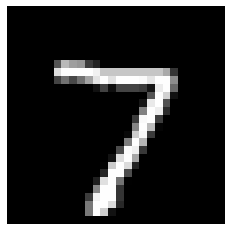

Sequential model's output before learning  tf.Tensor(
[[0.10023712 0.11629906 0.10256145 0.0925817  0.09975537 0.10148698
  0.08961983 0.10410066 0.10140332 0.09195449]], shape=(1, 10), dtype=float32)

Functional model's output before learning  tf.Tensor(
[[0.10023712 0.11629906 0.10256145 0.0925817  0.09975537 0.10148698
  0.08961983 0.10410066 0.10140332 0.09195449]], shape=(1, 10), dtype=float32)


In [9]:
# 画像の確認 -> 7
show(np.squeeze(X_test[0]), cmap="gray")
# 処理結果は０始まりなので，8番目が数字の7の予測結果になる
print("Sequential model's output before learning ", sequential_model(X_test[:1]))
print("\nFunctional model's output before learning ", functional_model(X_test[:1]))

In [10]:
sequential_model.fit(X_train, y_train, batch_size=16, epochs=3)

Epoch 1/3
3750/3750 [==============================] - 17s 4ms/step - loss: 1.6198 - accuracy: 0.8551
Epoch 2/3
3750/3750 [==============================] - 16s 4ms/step - loss: 1.4895 - accuracy: 0.9728
Epoch 3/3
3750/3750 [==============================] - 16s 4ms/step - loss: 1.4861 - accuracy: 0.9753


In [11]:
functional_model.fit(X_train, y_train, batch_size=16, epochs=3)

Epoch 1/3
3750/3750 [==============================] - 16s 4ms/step - loss: 1.6198 - accuracy: 0.8551
Epoch 2/3
3750/3750 [==============================] - 16s 4ms/step - loss: 1.4895 - accuracy: 0.9728
Epoch 3/3
3750/3750 [==============================] - 16s 4ms/step - loss: 1.4861 - accuracy: 0.9753


In [12]:
# 学習後の結果を確認
print("Sequential model's output after learning ", sequential_model(X_test[:1]))
print("\nFunctional model's output after learning ", functional_model(X_test[:1]))

# 精度の確認
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')
y_pred_seq = sequential_model(X_test)
test_accuracy(y_test, y_pred_seq)
print("\nSequential model test accuracy ", test_accuracy.result().numpy())

test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')
y_pred_fun = functional_model(X_test)
test_accuracy(y_test, y_pred_fun)
print("\nFunctional model test accuracy ", test_accuracy.result().numpy())

Sequential model's output after learning  tf.Tensor(
[[2.7142110e-29 6.9897501e-26 5.0706772e-22 4.3190319e-31 4.8621087e-34
  9.4096050e-35 0.0000000e+00 1.0000000e+00 8.8773830e-36 2.1320022e-29]], shape=(1, 10), dtype=float32)

Functional model's output after learning  tf.Tensor(
[[2.7142110e-29 6.9897501e-26 5.0706772e-22 4.3190319e-31 4.8621087e-34
  9.4096050e-35 0.0000000e+00 1.0000000e+00 8.8773830e-36 2.1320022e-29]], shape=(1, 10), dtype=float32)

Sequential model test accuracy  0.9818

Functional model test accuracy  0.9818
